<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/13_Capstone/ObjectDetection_autogluon_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

In [30]:
import pandas as pd 
import numpy as np
import os
import pydicom as dicom
import cv2
import shutil

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import autogluon.core as ag
from autogluon.vision import ObjectDetector



In [3]:
# DATA_ROOT_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/"
# META_DATA = os.path.join(DATA_ROOT_PATH,"stage_2_detailed_class_info.csv/stage_2_detailed_class_info.csv")
# TRAIN_LABEL = os.path.join(DATA_ROOT_PATH,"stage_2_train_labels.csv/stage_2_train_labels.csv")
# TRAIN_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_train_images")
# TEST_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_test_images")

# AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

# DATA_ROOT_PATH,META_DATA, TRAIN_LABEL,TRAIN_FOLDER,TEST_FOLDER

# infected_pd = train_data.query("Target == 1").sample(n=9,random_state = 32)
# # train_data.fillna(value =0,inplace = True)

# # for index, row in infected_pd.iterrows():
# #   print(row["filepath"])
# #   ds = dicom.dcmread(row["filepath"])
# #   cv2.imwrite(os.path.join(AUTOGLUON_PATH, "{}.jpg".format(row["patientId"])), ds.pixel_array)
# #   textfile = "{}.txt".format(row["patientId"])
# #   outfile = open(os.path.join(AUTOGLUON_PATH,textfile), 'w') 
# #   outfile.write("{} {} {} {} {}\n".format(row["Target"],row["x"],row["y"],row["width"],row["height"])) 
# #   outfile.close()


In [4]:
IMG_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/images/"
LABEL_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/labels/"
AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

In [5]:
train_data = pd.read_csv("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/final_data.csv")
train_data.head()

,Unnamed: 0,patientId,x,y,width,height,Target,class,filepath,Train_or_Test,area,age,sex,ViewPosition,BodyPartExamined
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,51,F,PA,CHEST
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,48,F,PA,CHEST
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,19,M,AP,CHEST
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,28,M,PA,CHEST
4,4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,80727.0,32,F,AP,CHEST


In [6]:
# infected_pd = train_data.query("Target == 1").sample(n=500,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"affected",img_name))
#   shutil.copyfile(os.path.join(LABEL_SOURCE_PATH,txt_name),os.path.join(AUTOGLUON_PATH,"affected",txt_name))

In [7]:
# not_infected_pd = train_data.query("Target == 0").sample(n=100,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"not_affected",img_name))


In [12]:
dataset_train = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/phe_dataset", splits='train')
dataset_train.head()

,image,rois,image_attr
0,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.2403846153846154, 'y...","{'width': 416.0, 'height': 416.0}"
1,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.21153846153846154, '...","{'width': 416.0, 'height': 416.0}"
2,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.12259615384615384, '...","{'width': 416.0, 'height': 416.0}"
3,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.20432692307692307, '...","{'width': 416.0, 'height': 416.0}"
4,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.37740384615384615, '...","{'width': 416.0, 'height': 416.0}"


Randomly split train_data into train[79]/validation[11] splits.
Starting HPO experiments


  0%|          | 0/5 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.dataset         voc_tiny != auto
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    20 != 10
root.train.seed      233 != 200
root.train.early_stop_patience -1 != 10
root.train.lr        0.001 != 0.0005
root.train.early_stop_baseline 0.0 != -inf
root.dataset_root    ~/.mxnet/datasets/ != auto
root.ssd.data_shape  300 != 512
root.ssd.base_network vgg16_atrous != resnet50_v1
root.gpus            (0, 1, 2, 3) != (0,)
}
Saved config to /content/8e370b74/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 77.489354, CrossEntropy=5.940078, SmoothL1=2.875363
[Epoch 0] Validation: 
0=0.0005470958329534056
mAP=0.0005470958329534056
[Epoch 0] Current best map: 0.000547 vs previous 0.000000, saved to /content/8e370b74/.trial_0/best_checkpoint.p


100%|██████████| 224190/224190 [00:04<00:00, 54188.51KB/s]
Start training from [Epoch 0]
[Epoch 0] Training cost: 77.756, ObjLoss=1369.971, BoxCenterLoss=4.689, BoxScaleLoss=2.435, ClassLoss=1.081
[Epoch 0] Validation: 
0=0.0
mAP=0.0
[Epoch 1] Training cost: 86.200, ObjLoss=633.332, BoxCenterLoss=4.685, BoxScaleLoss=2.301, ClassLoss=1.084
[Epoch 1] Validation: 
0=0.0
mAP=0.0
[Epoch 2] Training cost: 288.474, ObjLoss=418.119, BoxCenterLoss=4.657, BoxScaleLoss=2.178, ClassLoss=1.088
[Epoch 2] Validation: 
0=0.007575757575757575
mAP=0.007575757575757575
[Epoch 2] Current best map: 0.007576 vs previous 0.000000, saved to /content/8e370b74/.trial_1/best_checkpoint.pkl
[Epoch 3] Training cost: 141.615, ObjLoss=320.359, BoxCenterLoss=4.626, BoxScaleLoss=2.051, ClassLoss=1.041
[Epoch 3] Validation: 
0=0.0
mAP=0.0
[Epoch 4] Training cost: 523.128, ObjLoss=264.016, BoxCenterLoss=4.588, BoxScaleLoss=1.994, ClassLoss=1.008
[Epoch 4] Validation: 
0=0.0
mAP=0.0
[Epoch 5] Training cost: 121.734, Obj


 92%|█████████▏| 86009/93076 [00:01<00:00, 61722.79KB/s]
93077KB [00:01, 60080.42KB/s]                           
	Time limit exceeded
modified configs(<old> != <new>): {
root.dataset         voc_tiny != auto
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    20 != 10
root.train.seed      233 != 200
root.train.early_stop_patience -1 != 10
root.train.lr        0.001 != 0.0005
root.train.early_stop_baseline 0.0 != -inf
root.dataset_root    ~/.mxnet/datasets/ != auto
root.ssd.data_shape  300 != 512
root.ssd.base_network vgg16_atrous != resnet50_v1
root.gpus            (0, 1, 2, 3) != (0,)
}
Saved config to /content/8e370b74/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 76.356886, CrossEntropy=6.024564, SmoothL1=2.768964
[Epoch 0] Validation: 
0=0.0028483120546028665
mA

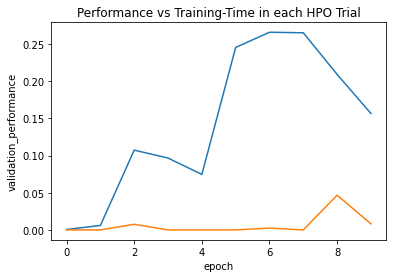

Finished, total runtime is 3631.28 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 4,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.

NameError: ignored

In [14]:
time_limit = 1*60*60 # 5 hours
epochs = 10
hyperparameter_tune_kwargs={'num_trials': 5}

detector = ObjectDetector()
detector.fit(dataset_train,
             hyperparameters={'lr': ag.Categorical(5e-4, 1e-4), 'epochs': epochs},
             ngpus_per_trial=1,
             time_limit=time_limit,
             hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


In [15]:
# Evaluation on test dataset
dataset_test = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/phe_dataset", splits='test')
test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

# visualization
result = detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)

mAP on test dataset: 0.1079762331495791


NumExpr defaulting to 4 threads.


Prediction result:    predict_class  ...                                       predict_rois
0              0  ...  {'xmin': 0.15744930505752563, 'ymin': 0.0, 'xm...
1              0  ...  {'xmin': 0.6870408058166504, 'ymin': 0.6524213...
2              0  ...  {'xmin': 0.5407744646072388, 'ymin': 0.3211982...
3              0  ...  {'xmin': 0.1717337965965271, 'ymin': 0.2701416...
4              0  ...  {'xmin': 0.6445436477661133, 'ymin': 0.5636025...
..           ...  ...                                                ...
95             0  ...  {'xmin': 0.964365541934967, 'ymin': 0.52279889...
96             0  ...  {'xmin': 0.21170209348201752, 'ymin': 0.316737...
97             0  ...  {'xmin': 0.7337889671325684, 'ymin': 0.7063910...
98             0  ...  {'xmin': 0.22539931535720825, 'ymin': 0.359696...
99             0  ...  {'xmin': 0.27112144231796265, 'ymin': 0.110576...

[100 rows x 3 columns]


In [43]:
savefile = '/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/model/detector_autog.pkl'
detector.save(savefile)
new_detector = ObjectDetector.load(savefile)

result = new_detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Prediction result:    predict_class  ...                                       predict_rois
0              0  ...  {'xmin': 0.15744930505752563, 'ymin': 0.0, 'xm...
1              0  ...  {'xmin': 0.6870408058166504, 'ymin': 0.6524213...
2              0  ...  {'xmin': 0.5407744646072388, 'ymin': 0.3211982...
3              0  ...  {'xmin': 0.1717337965965271, 'ymin': 0.2701416...
4              0  ...  {'xmin': 0.6445436477661133, 'ymin': 0.5636025...
..           ...  ...                                                ...
95             0  ...  {'xmin': 0.964365541934967, 'ymin': 0.52279889...
96             0  ...  {'xmin': 0.21170209348201752, 'ymin': 0.316737...
97             0  ...  {'xmin': 0.7337889671325684, 'ymin': 0.7063910...
98             0  ...  {'xmin': 0.22539931535720825, 'ymin': 0.359696...
99             0  ...  {'xmin': 0.27112144231796265, 'ymin': 0.110576...

[100 rows x 3 columns]


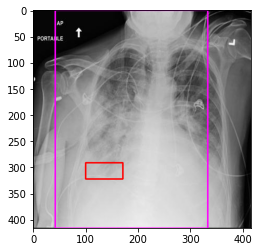

In [42]:
# imgcv = cv2.imread(dataset_train.iloc[0]["image"])

# cv2.rectangle(imgcv, (int(0.2403846153846154 * 416),
#                       int(0.6995192307692307*416)), 
#               (int(0.4110576923076923*416), int(0.7740384615384616*416)), (255,0,0), 2)

# cv2.rectangle(imgcv, (int(0.10230743885040283 * 416),
#                       int(0*416)), 
#               (int(0.8006809949874878*416), int(1*416)), (255,0,255), 2)
# plt.imshow(imgcv,"bone") 
# plt.show()
